<a href="https://colab.research.google.com/github/wamong/2025-1-myclass-BDA/blob/main/inclass/05w_B_wed_0402_dataframe_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5주차

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.11/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
2.2.2
2.0.2
0.13.2


In [3]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [7]:
df = df_raw
df.iloc[1,1] = 100
df_raw

,var1,var2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [8]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [9]:
df_new.rename(columns = {'var2': 'v2'})

,var1,v2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [10]:
df_new

,var1,var2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [11]:
df_new.rename(columns = {'var2': 'v2'}, inplace=True)
df_new

,var1,v2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [12]:
df_raw

,var1,var2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [13]:
df_new

,var1,v2,var3
0,1,2,10
1,2,100,20
2,1,2,30


In [16]:
df_new.rename(index = {0: "x", 1: "y", 2: "z"}, inplace=True)
df_new

,var1,v2,var3
x,1,2,10
y,2,100,20
z,1,2,30


In [17]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [18]:
df

,A,B
0,1,4
1,2,5
2,3,6


파생변수 만들기

In [19]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [20]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [21]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [22]:
df1["var_mean"] = (df1["var1"] + df1["var2"]) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [23]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df2.sum()

,0
var1,15
var2,9


In [25]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [26]:
df2['my_sum'] = df2.sum(axis='columns')
df2

,var1,var2,my_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [27]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [28]:
df2["my_mean"] = df2[["var1","var2"]].mean(axis=1) # 시험 예상 문제
df2

,var1,var2,my_sum,my_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


# mpg 데이터 불러오기

In [30]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [31]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
61,dodge,durango 4wd,5.2,1999,8,auto(l4),4,11,16,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
38,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
35,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact


In [32]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [33]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [34]:
sum(mpg['total']) / len(mpg)

20.14957264957265

In [35]:
mpg['total'].mean()

np.float64(20.14957264957265)

In [36]:
mpg.total = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [38]:
mpg['total'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


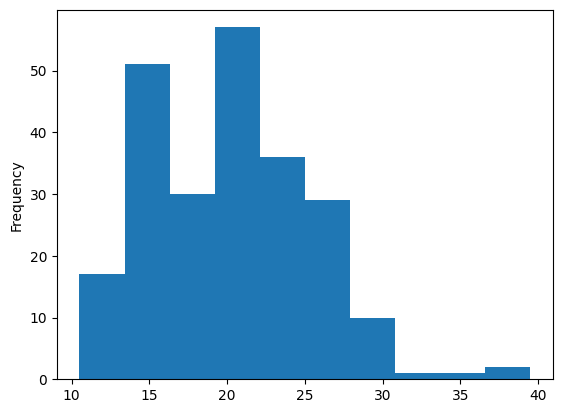

In [41]:
mpg['total'].plot.hist();

In [42]:
!pip install koreanize-matplotlib

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI})

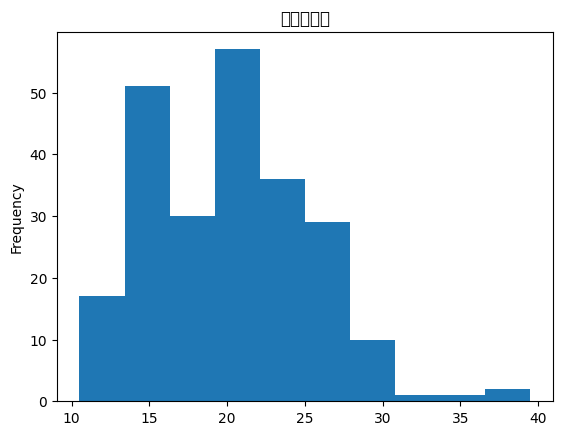

In [43]:
mpg['total'].plot(kind="hist", title="히스토그램");

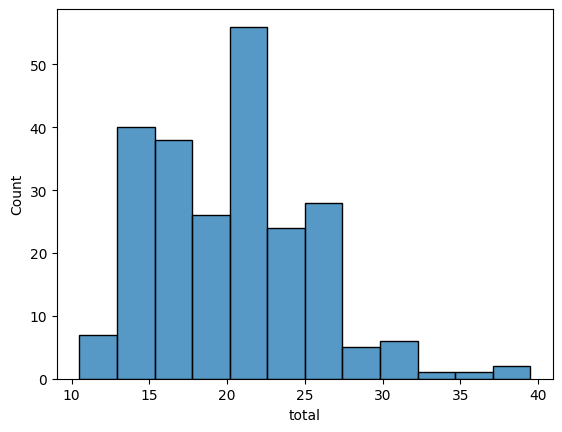

In [44]:
import seaborn as sns

sns.histplot(mpg, x="total");

In [45]:
import numpy as np

mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
92,ford,mustang,4.0,2008,6,manual(m5),r,17,26,r,subcompact,21.5,21.5,pass
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact,23.5,23.5,pass
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv,12.5,12.5,fail
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,32.5,pass
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,20.5,20.5,pass
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup,14.0,14.0,fail
28,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,14,19,r,suv,16.5,16.5,fail
114,hyundai,sonata,3.3,2008,6,auto(l5),f,19,28,r,midsize,23.5,23.5,pass
35,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize,23.5,23.5,pass
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,19.5,fail


In [46]:
mpg['test'].value_counts()

,count
test,
pass,128
fail,106


In [47]:
mpg['test'].unique()

array(['pass', 'fail'], dtype=object)

In [48]:
count_test = mpg['test'].value_counts()  # 연비 합격 빈도표를 변수에 할당
count_test

,count
test,
pass,128
fail,106


In [49]:
type(count_test)

pandas.core.series.Series

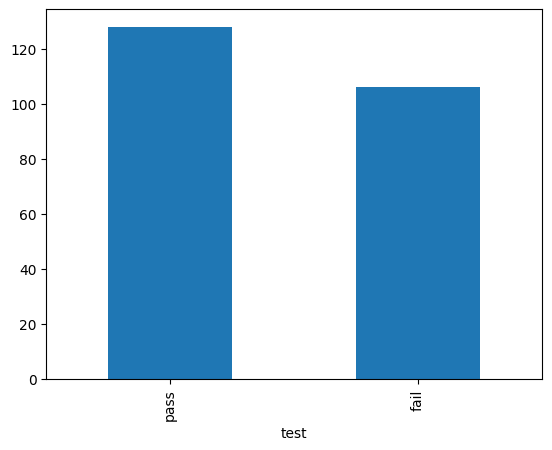

In [50]:
count_test.plot.bar();

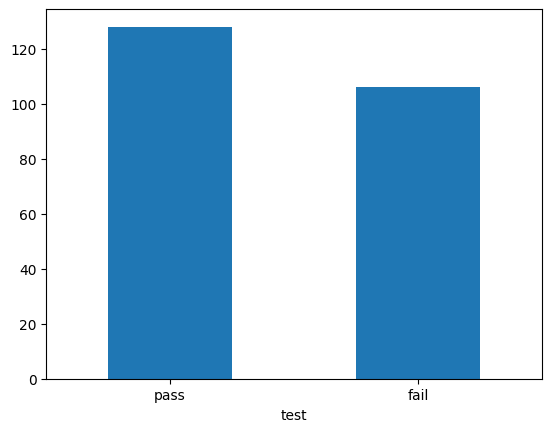

In [51]:
count_test.plot.bar(rot = 0);

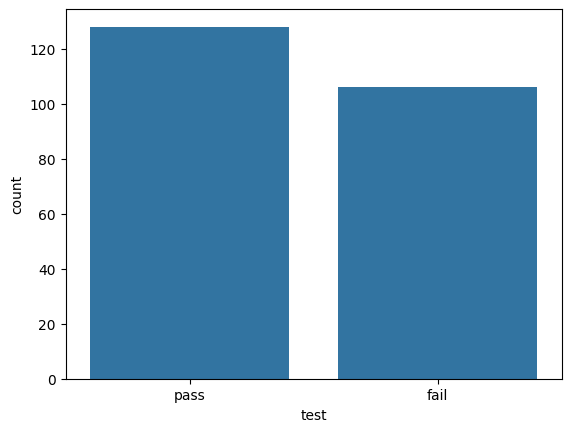

In [52]:
sns.countplot(mpg, x="test");

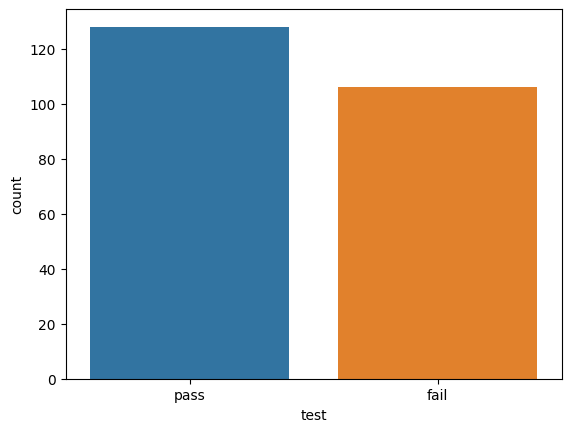

In [53]:
sns.countplot(mpg, x="test", hue="test");

In [54]:
sns.__version__

'0.13.2'

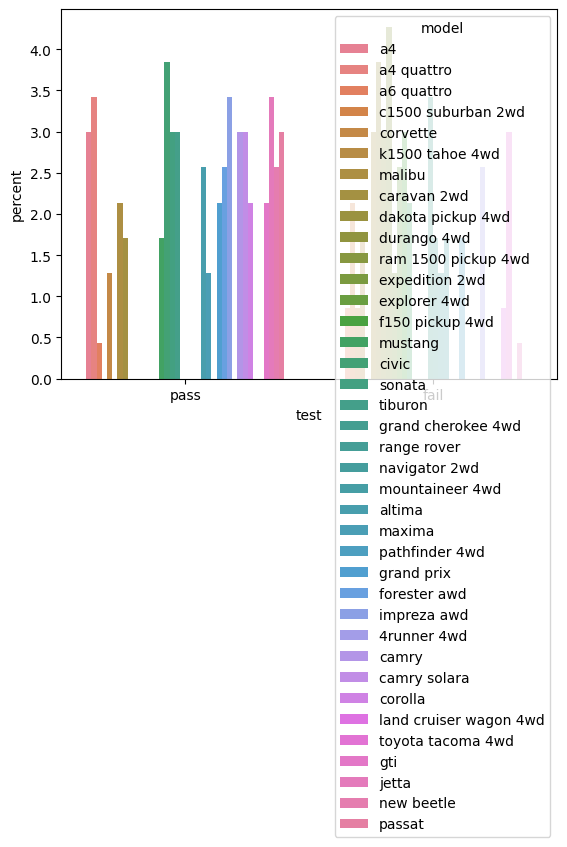

In [57]:
sns.countplot(data=mpg, x="test", hue="model", stat= "percent");

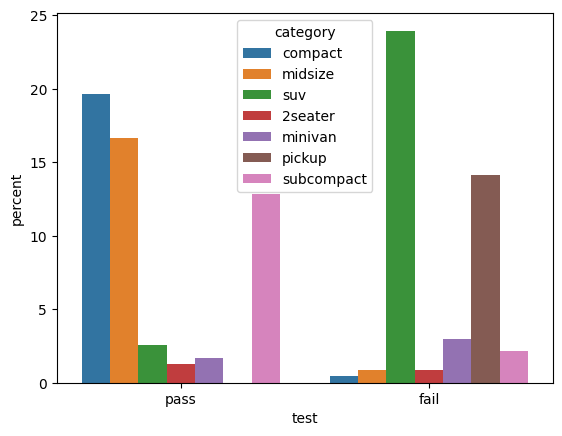

In [56]:
sns.countplot(data=mpg, x="test", hue="category", stat= "percent");

In [58]:
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
               np.where(mpg['total'] >= 20, 'B', 'C'))

In [59]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0,25.0,pass,B
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0,21.0,pass,B
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,19.5,19.5,fail,C
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup,14.0,14.0,fail,C
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv,15.0,15.0,fail,C


In [61]:
n_grade = mpg['grade'].value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


<Axes: xlabel='grade'>

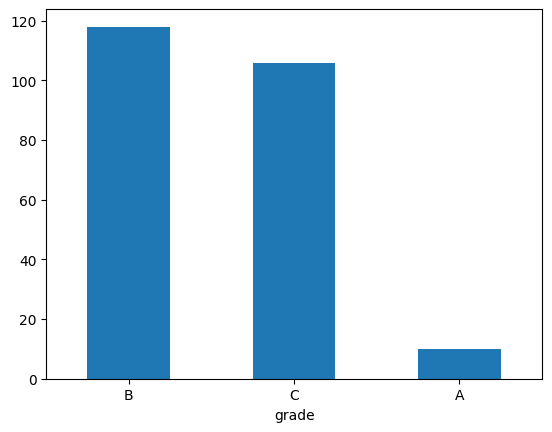

In [62]:
n_grade.plot.bar(rot = 0)

In [63]:
n_grade = mpg['grade'].value_counts().sort_index()  # 등급 빈도표 만들기
n_grade

,count
grade,
A,10
B,118
C,106


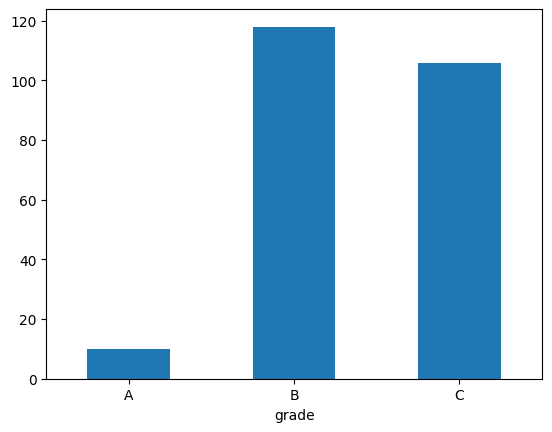

In [64]:
n_grade.plot.bar(rot = 0);

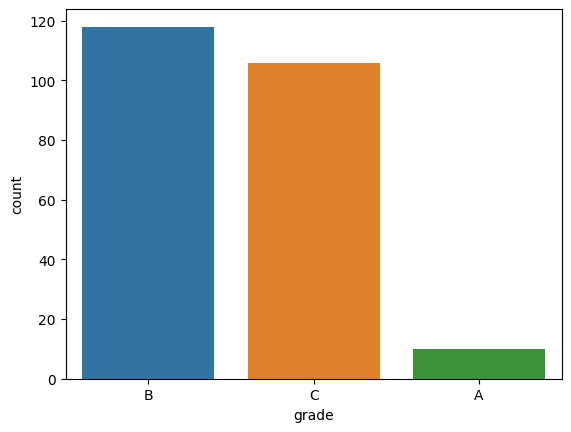

In [65]:
sns.countplot(mpg, x="grade", hue="grade");

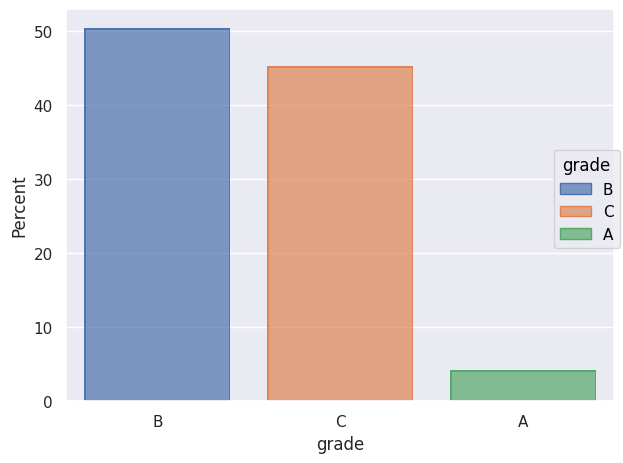

In [66]:
from seaborn import objects as so
import seaborn as sns

mpg
(
    so.Plot(mpg, x="grade", color="grade")
    .add(so.Bar(), so.Hist(stat="percent"))
    .label(y="Percent")
    .show()
)

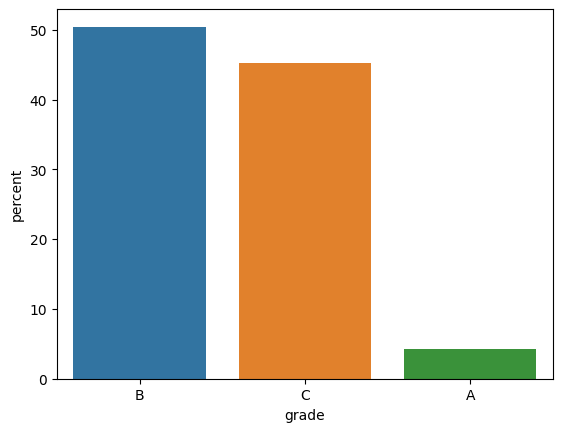

In [67]:
sns.countplot(mpg, x="grade", hue="grade", stat='percent');

In [68]:
mpg['grade'].value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

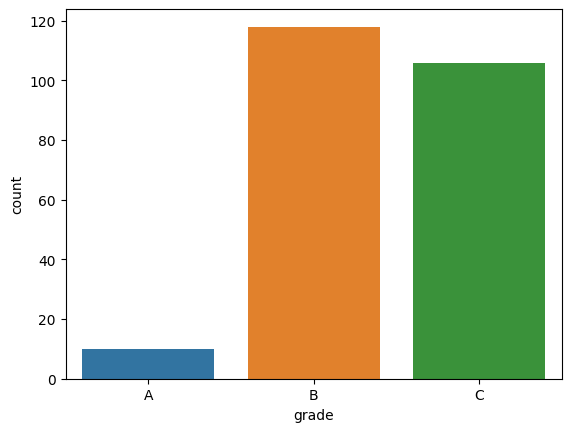

In [69]:
order = mpg['grade'].value_counts().sort_index().index
sns.countplot(mpg, x="grade", hue="grade", order=order, hue_order=order);

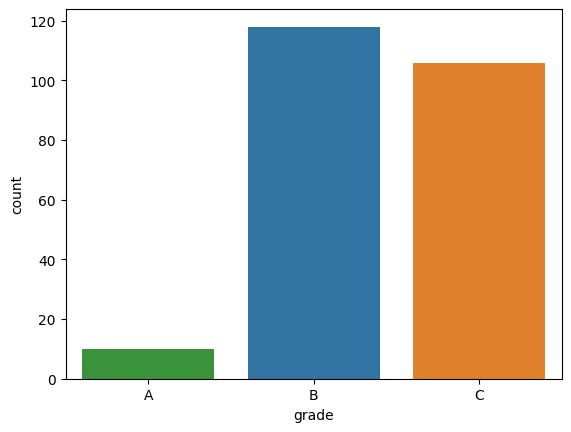

In [70]:
sns.countplot(mpg, x="grade", hue="grade", order=mpg['grade'].value_counts().sort_index().index);

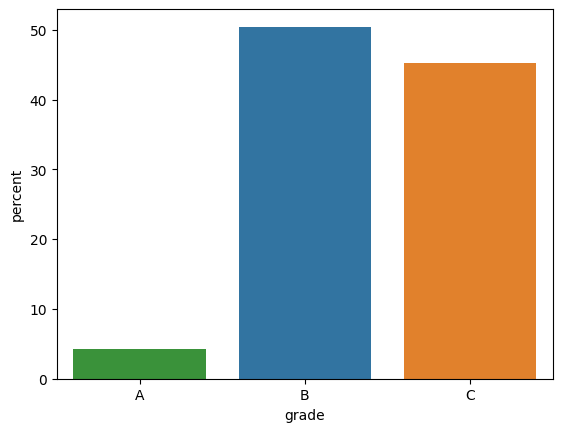

In [71]:
sns.countplot(mpg, x="grade", hue="grade", stat='percent', order=["A", "B", "C"]);

In [72]:
mpg['grade'].unique()

array(['B', 'C', 'A'], dtype=object)

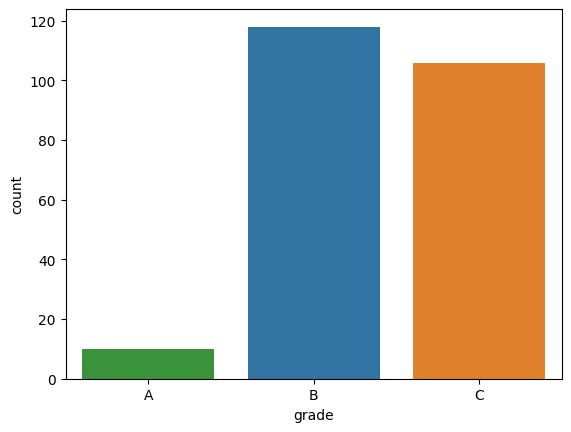

In [73]:
sns.countplot(mpg, x="grade", hue="grade", order=np.sort(mpg['grade'].unique()));

## 메소드 체이닝

In [74]:
mpg.grade.value_counts().sort_index()

,count
grade,
A,10
B,118
C,106


In [75]:
d = mpg.grade.value_count()
d.sort_index

AttributeError: 'Series' object has no attribute 'value_count'

In [78]:
mpg['grade2'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 25, 'B',
                np.where(mpg['total'] >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,35.0,pass,A,A
108,hyundai,sonata,2.4,1999,4,auto(l4),f,18,26,r,midsize,22.0,22.0,pass,B,C
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv,16.5,16.5,fail,C,D
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5,24.5,pass,B,C
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,19.0,19.0,fail,C,D


In [79]:
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')

mpg['size'].value_counts()

,count
size,
large,147
small,87


In [81]:
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')

mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade,grade2,size
156,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize,22.0,22.0,pass,B,C,large
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,21.0,pass,B,C,small
179,toyota,camry,2.2,1999,4,manual(m5),f,21,29,r,midsize,25.0,25.0,pass,B,B,large
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact,23.5,23.5,pass,B,C,small
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,19.5,19.5,fail,C,D,large


In [83]:
mpg['size'].value_counts()

,count
size,
large,147
small,87


In [84]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size'].value_counts()

,count
size,
large,147
small,87


# 정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

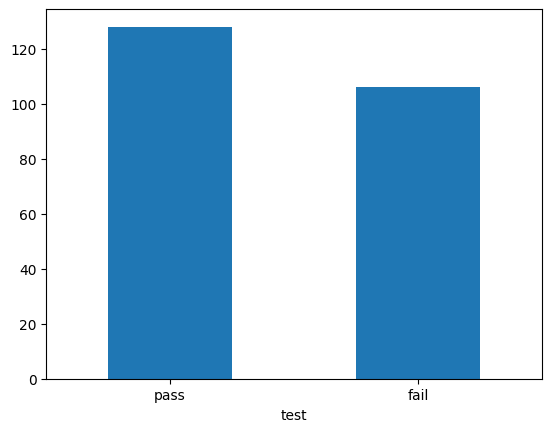

In [86]:
# 1. 패키지 로드
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('data/mpg.csv')

# 3. 데이터 파악하기
mpg.shape       # 행, 열 수
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용

# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

## 단원 06

In [87]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
18,19,5,89,68,87
3,4,1,30,98,58
16,17,5,65,68,98
2,3,1,45,86,78


In [88]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [89]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [90]:
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [91]:
exam.query('nclass != 2')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [92]:
exam.nclass == 2

,nclass
0,False
1,False
2,False
3,False
4,True
5,True
6,True
7,True
8,False
9,False


In [94]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [95]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [96]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [98]:
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [99]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [100]:
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [101]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [102]:
3 in [1, 2, 3, 4]

True

In [103]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [104]:
exam[exam.nclass.isin([1, 3, 5])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [105]:
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [106]:
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [107]:
nclass1["math"].mean()

np.float64(46.25)

In [108]:
nclass2.english.mean()

np.float64(84.25)

In [109]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [110]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [113]:
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


In [114]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [115]:
var = 3
exam.query(f'nclass == {var}')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


df.isin()

In [117]:
df = pd.DataFrame({'num_legs': [2,4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [118]:
df.isin([0, 4])

,num_legs,num_wings
falcon,False,False
dog,True,True


In [119]:
~df.isin([0, 4])

,num_legs,num_wings
falcon,True,True
dog,False,False


In [121]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [122]:
exam.columns[3]

'english'

In [126]:
exam.math

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [123]:
exam[exam.columns[3]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [124]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [125]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


## df.drop()

In [127]:
exam.drop(columns="math")

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [128]:
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [129]:
exam.drop(columns=["math", 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [131]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [132]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [133]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [134]:
exam.drop(index=[2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [135]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [136]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [137]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [138]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [139]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [140]:
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [141]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [145]:
exam[exam.math >= 50][['id', 'math']].head(3)

,id,math
0,1,50
1,2,60
5,6,50


In [143]:
exam[exam.math >= 50][['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [146]:
exam.query('math >= 50') \
    [['id', 'math']] \
    .head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [147]:
exam.query('math >= 50')[['id', 'math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [148]:
exam.sort_values('math', ascending=False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65
16,17,5,65,68,98
1,2,1,60,97,60
15,16,4,58,98,65


In [150]:
exam.sort_values('math', ascending=False).head()

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58


In [151]:
exam.sort_values('math', ascending=False).head(7)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90
19,20,5,78,83,58
14,15,4,75,56,78
10,11,3,65,65,65


In [152]:
exam.sort_values(['nclass', 'math']).head(10)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [153]:
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(10)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


# 종료